# Per Tissue Analysis and Prediction Using Pytorch Classifier
Aditya Ramakrish

## Database Setup

In [297]:
import pandas as pd
from pathlib import Path
from os import listdir
import sklearn.model_selection
import sklearn.feature_selection
TISSUE='Lung'

In [298]:
data_dir=Path("data")
tissue_dir=Path("tissue-specific")
manifest={"data":"All_Tissue_Site_Details.combined.reads.gct",
              "sample_meta":"GTEx_v7_Annotations_SampleAttributesDS.txt",
              "subject_meta":"GTEx_v7_Annotations_SubjectPhenotypesDS.txt",
               "merged_meta":"merged_meta.tsv"}
meta=pd.read_csv(data_dir/manifest['merged_meta'],sep="\t",dtype={'SMUBRID':object,'SEX':object,'DTHHRDY':object})
meta=meta[~(meta['AGE'].isnull())] # removes all samples without age
meta.iloc[0:3,:]
meta.shape

(10346, 67)

## Avaiable Tissues

In [299]:
# To do python plots of counts
infiles=listdir(data_dir/tissue_dir)
TISSUE_files=[f for f in infiles if  TISSUE in f]
TISSUE_files

['Lung_c.tsv', 'Lung_cpm.tsv', 'Lung_lcpm.tsv']

## Reading CPM and LCPM files.

In [300]:
cpm=pd.read_csv(data_dir/tissue_dir/TISSUE_files[1],sep="\t",index_col=0)
lcpm=pd.read_csv(data_dir/tissue_dir/TISSUE_files[0],sep="\t",index_col=0)

In [301]:
cpm.iloc[0:5,0:20]

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000222623,ENSG00000241599,ENSG00000228463,ENSG00000237094,ENSG00000250575,ENSG00000233653,ENSG00000224813
GTEX-111CU-0326-SM-5GZXO,0.056880,5.346714,0.000000,0.056880,0.000000,0.014220,0.014220,0.028440,0.725219,27.529891,0.099540,0.227520,2.246758,0.0,0.028440,0.568799,0.327060,0.042660,0.028440,0
GTEX-111FC-1126-SM-5GZWU,0.079330,10.408133,0.031732,0.015866,0.015866,0.015866,0.015866,0.047598,0.285589,12.105801,0.063464,0.253857,0.761571,0.0,0.000000,1.047160,0.745705,0.063464,0.079330,0
GTEX-111VG-0726-SM-5GIDC,0.049281,4.743255,0.024640,0.012320,0.000000,0.049281,0.024640,0.024640,0.123201,11.987498,0.061601,0.234083,1.490737,0.0,0.000000,0.086241,0.529766,0.049281,0.073921,0
GTEX-111YS-0626-SM-5GZXV,0.013898,3.238148,0.000000,0.027795,0.013898,0.000000,0.013898,0.111181,0.486417,23.111757,0.069488,0.333543,0.819960,0.0,0.055591,0.833858,0.819960,0.055591,0.097283,0
GTEX-1122O-0126-SM-5GICA,0.069218,7.420174,0.013844,0.013844,0.000000,0.000000,0.000000,0.083062,0.567588,33.819936,0.083062,0.470683,1.273612,0.0,0.013844,1.855044,0.567588,0.083062,0.083062,0


In [302]:
lcpm.iloc[0:5,0:20]

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000222623,ENSG00000241599,ENSG00000228463,ENSG00000237094,ENSG00000250575,ENSG00000233653,ENSG00000224813
GTEX-111CU-0326-SM-5GZXO,4,376,0,4,0,1,1,2,51,1936,7,16,158,0,2,40,23,3,2,0
GTEX-111FC-1126-SM-5GZWU,5,656,2,1,1,1,1,3,18,763,4,16,48,0,0,66,47,4,5,0
GTEX-111VG-0726-SM-5GIDC,4,385,2,1,0,4,2,2,10,973,5,19,121,0,0,7,43,4,6,0
GTEX-111YS-0626-SM-5GZXV,1,233,0,2,1,0,1,8,35,1663,5,24,59,0,4,60,59,4,7,0
GTEX-1122O-0126-SM-5GICA,5,536,1,1,0,0,0,6,41,2443,6,34,92,0,1,134,41,6,6,0


### Merging metadata

In [303]:
print(meta['SMTS'].unique())

['Adipose - Subcutaneous' 'Adipose - Visceral (Omentum)' 'Adrenal Gland'
 'Artery - Aorta' 'Artery - Coronary' 'Artery - Tibial' 'Bladder'
 'Brain - Cerebellum' 'Brain - Cortex' 'Breast - Mammary Tissue'
 'Cells - EBV-transformed lymphocytes' 'Cells - Transformed fibroblasts'
 'Cervix - Ectocervix' 'Cervix - Endocervix' 'Colon - Sigmoid'
 'Colon - Transverse' 'Esophagus - Gastroesophageal Junction'
 'Esophagus - Mucosa' 'Esophagus - Muscularis' 'Fallopian Tube'
 'Heart - Atrial Appendage' 'Heart - Left Ventricle' 'Kidney - Cortex'
 'Liver' 'Lung' 'Minor Salivary Gland' 'Muscle - Skeletal'
 'Nerve - Tibial' 'Ovary' 'Pancreas' 'Pituitary' 'Prostate'
 'Skin - Not Sun Exposed (Suprapubic)' 'Skin - Sun Exposed (Lower leg)'
 'Small Intestine - Terminal Ileum' 'Spleen' 'Stomach' 'Testis' 'Thyroid'
 'Uterus' 'Vagina' 'Whole Blood']


In [326]:
#tissue_meta = meta[pd.np.where(meta['SMTSD'].str.contains(TISSUE))]
#print(tissue_meta)
tissue_meta=meta[meta['SMTS']==TISSUE]
tissue_meta.iloc[0:5]

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS,SUBJID,SEX,AGE,DTHHRDY
6711,GTEX-111CU-0326-SM-5GZXO,0.0,B1,"2 pieces, numerous hemosiderin-laden macrophag...",7.6,Lung,Lung,0008952,70.0,639.0,...,50.091614,0.004521,0.994604,NaN,0.0,50.155884,GTEX-111CU,1.0,50-59,0.0
6712,GTEX-111FC-1126-SM-5GZWU,1.0,B1,"2 pieces, one piece includes large vessel and ...",7.2,Lung,Lung,0008952,1080.0,830.0,...,50.074505,0.005338,0.991708,NaN,0.0,50.084560,GTEX-111FC,1.0,60-69,1.0
6713,GTEX-111VG-0726-SM-5GIDC,2.0,B1,2 pieces; chronic passive congestion with fibr...,5.9,Lung,Lung,0008952,1017.0,940.0,...,50.107610,0.003474,0.988121,NaN,0.0,50.116160,GTEX-111VG,1.0,60-69,3.0
6714,GTEX-111YS-0626-SM-5GZXV,1.0,B1,"2 small, irregular, fragmented pieces (7x5 & 5...",8.1,Lung,Lung,0008952,133.0,756.0,...,50.088367,0.003788,0.993750,NaN,0.0,50.095627,GTEX-111YS,1.0,60-69,0.0
6715,GTEX-1122O-0126-SM-5GICA,0.0,B1,"2 pieces, patchy bronchopneumonia",7.6,Lung,Lung,0008952,68.0,935.0,...,50.015080,0.004105,0.993588,NaN,0.0,50.178780,GTEX-1122O,2.0,60-69,0.0


## Test and Train Set Creation

In [327]:
cpm_train, cpm_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(cpm, tissue_meta['AGE'], test_size=.3, random_state=1234) # random state guarantees that the same split is made for a given tissue.
print(cpm_train.shape)
#print(cpm_train.head())
print(tissue_meta['AGE'].unique())
print(cpm_test.shape)
print(y_train.head())
print(y_test.shape)
sum(cpm_train.iloc[:,0]) # Confirms that the split is the same each time

(298, 56202)
['50-59' '60-69' '30-39' '20-29' '40-49' '70-79']
(129, 56202)
6747    40-49
6991    50-59
6748    60-69
6994    50-59
6914    50-59
Name: AGE, dtype: object
(129,)


12.659069469070724

## Filter by Expression
As adapted from the edgeR package function [filterByExpression](https://rdrr.io/bioc/edgeR/src/R/filterByExpr.R).

In [328]:
def filter_by_expr(min):
    pass

In [329]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data

In [330]:
cpm_new = cpm_train.as_matrix()
cpm_new = np.delete(cpm_new,0,axis=1)
print(cpm_new)

[[6.32297881e+00 1.94553194e-02 1.94553194e-02 ... 5.01497823e+03
  0.00000000e+00 1.94553194e-02]
 [7.08842314e+00 6.11070960e-02 6.11070960e-02 ... 6.27119211e+03
  0.00000000e+00 1.52767740e-02]
 [5.94146293e+00 4.25403074e-02 1.41801025e-02 ... 6.77940772e+03
  0.00000000e+00 4.25403074e-02]
 ...
 [9.88236901e+00 1.80775043e-01 0.00000000e+00 ... 9.28767937e+03
  0.00000000e+00 0.00000000e+00]
 [9.30836021e+00 1.63161441e-02 3.26322882e-02 ... 3.71167804e+03
  3.26322882e-02 4.89484323e-02]
 [8.36927162e+00 4.90866371e-02 7.36299556e-02 ... 2.22912236e+03
  0.00000000e+00 0.00000000e+00]]


C:\Users\adity\Anaconda3\envs\cs418env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [331]:
y_train_new = y_train.map({'20-29':0,'30-39':1,'40-49':2,'50-59':3, '60-69':4,
       '70-79':5})

In [332]:
class my_points():
    def __init__(self):
        #pd_data = pd.read_csv(filename).values   # Read data file.
        self.data = cpm_new # 1st and 2nd columns --> x,y
        self.target = y_train_new.as_matrix() # 3nd column --> label
        self.n_samples = self.data.shape[0]
    
    def __len__(self):   # Length of the dataset.
        return self.n_samples
    
    def __getitem__(self, index):
        # Function that returns one point and one label.
        #print(self.target[index])
        #print(self.data[index])
        #return torch.Tensor(self.data[index]), torch.Tensor(self.target[index])
        return self.data[index], self.target[index]

In [333]:
# We create the dataloader.
#my_data = my_points('clas.csv')
import torch.utils.data as data
my_data = my_points()
batch_size = 1
my_loader = data.DataLoader(my_data,batch_size=batch_size,num_workers=0)


C:\Users\adity\Anaconda3\envs\cs418env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [334]:
# We build a simple model with the inputs and six output layers(one for each age group).
class my_model(nn.Module):
    def __init__(self,n_in=56201,n_hidden=10,n_out=6):
        super(my_model,self).__init__()
        self.n_in  = n_in
        self.n_out = n_out
         
        self.linearlinear = nn.Sequential(
            nn.Linear(self.n_in,self.n_out,bias=True),   # Hidden layer.
            )
        self.logprob = nn.LogSoftmax(dim=1)                 # -Log(Softmax probability).
    
    def forward(self,x):
        x = self.linearlinear(x)
        x = self.logprob(x)
        return x

In [335]:
# Now, we create the mode, the loss function or criterium and the optimizer 
# that we are going to use to minimize the loss.

# Model.
model = my_model()

# Negative log likelihood loss.
criterium = nn.NLLLoss()

# Adam optimizer with learning rate 0.1 and L2 regularization with weight 1e-4.
optimizer = torch.optim.Adam(model.parameters(),lr=0.1,weight_decay=1e-4)

In [336]:
# Taining.
model.double()
accuracy=0
for epoch in range(3):
    truecount=0
    totalcount=0
    
    for k, (data, target) in enumerate(my_loader):
        model.zero_grad()
        log_p = model(data)
        loss = criterium(log_p,target)
        loss.backward()
        #print(target)#, torch.max(torch.exp(log_p),1))
        #print(type(torch.max(torch.exp(log_p),1)))
        #print(torch.max(torch.exp(log_p),1)[1])
        totalcount+=1
        if(target == torch.max(torch.exp(log_p),1)[1]):
            truecount+=1
        

        # Print loss every 10 iterations.
        #if k%10==0:
        #    print('Loss {:.4f} at iter {:d}'.format(loss.item(),k))

        # Model weight modification based on the optimizer. 
        optimizer.step()
    #output = (log_p>0.5).float()
    #correct = (output == labels).float().sum()
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss.data[0], correct/x.shape[0]))
    if ((truecount/totalcount)*100)>accuracy:
        accuracy = (truecount/totalcount)*100
    print(truecount/totalcount)
#print(log_p)
print('Accuracy for ',TISSUE,' tissue: ',accuracy)
   

0.2785234899328859
0.3624161073825503
0.36577181208053694
Accuracy for  Lung  tissue:  36.577181208053695


In [86]:
colors = ['r','b','g','y']
points = data.numpy()

# Ground truth.
target = target.numpy()
for k in range(4):
    select = target[:,0]==k
    p = points[select,:]
    plt.scatter(p[:,0],p[:,1],facecolors=colors[k])

# Predictions.
pred = pred.exp().detach()     # exp of the log prob = probability.
_, index = torch.max(pred,1)   # index of the class with maximum probability.
pred = pred.numpy()
index = index.numpy()
for k in range(4):
    select = index==k
    p = points[select,:]
    plt.scatter(p[:,0],p[:,1],s=60,marker='s',edgecolors=colors[k],facecolors='none')

plt.show()

IndexError: too many indices for array

In [213]:
#Accuracy for  Liver  tissue:  45.08196721311475
#Accuracy for  Lung  tissue:  36.577181208053695
#Accuracy for  Stomach  tissue:  39.010989010989015
#Accuracy for  Pancreas  tissue:  34.68208092485549
#Accuracy for  Thyroid  tissue:  39.1025641025641
#Accuracy for  Spleen  tissue:  37.16814159292036
#Accuracy for  Vagina  tissue:  38.75
#Accuracy for  Uterus  tissue:  44.15584415584416



In [246]:
import pandas as pd
from pathlib import Path
from os import listdir
import sklearn.model_selection
import sklearn.feature_selection
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data

data_dir=Path("data")
tissue_dir=Path("tissue-specific")
manifest={"data":"All_Tissue_Site_Details.combined.reads.gct",
              "sample_meta":"GTEx_v7_Annotations_SampleAttributesDS.txt",
              "subject_meta":"GTEx_v7_Annotations_SubjectPhenotypesDS.txt",
               "merged_meta":"merged_meta.tsv"}
meta=pd.read_csv(data_dir/manifest['merged_meta'],sep="\t",dtype={'SMUBRID':object,'SEX':object,'DTHHRDY':object})
meta=meta[~(meta['AGE'].isnull())] # removes all samples without age
#meta=meta[~(np.isnan(meta['AGE']))]
#meta.iloc[0:3,:]
counts=pd.DataFrame(meta['SMTS'].value_counts())
df=meta[meta['SMTS'].isin(counts[counts['SMTS']>200].index)]
df=pd.crosstab(index=df['SMTS'],columns=df['AGE'])
tissues = df.index.values
print(tissues)


['Adipose Tissue' 'Blood' 'Blood Vessel' 'Brain' 'Breast' 'Colon'
 'Esophagus' 'Heart' 'Lung' 'Muscle' 'Nerve' 'Pancreas' 'Skin' 'Stomach'
 'Testis' 'Thyroid']


In [247]:
class my_points():
    def __init__(self):
        self.data = cpm_new 
        self.target = y_train_new.as_matrix() 
        self.n_samples = self.data.shape[0]
    
    def __len__(self):   
        return self.n_samples
    
    def __getitem__(self, index):
        return self.data[index], self.target[index]

In [248]:
# We build a simple model with the inputs and six output layers(one for each age group).
class my_model(nn.Module):
    def __init__(self,n_in=56201,n_hidden=10,n_out=6):
        super(my_model,self).__init__()
        self.n_in  = n_in
        self.n_out = n_out
         
        self.linearlinear = nn.Sequential(
            nn.Linear(self.n_in,self.n_out,bias=True),   # Hidden layer.
            )
        self.logprob = nn.LogSoftmax(dim=1)                 # -Log(Softmax probability).
    
    def forward(self,x):
        x = self.linearlinear(x)
        x = self.logprob(x)
        return x

In [339]:

infiles=listdir(data_dir/tissue_dir)
tissueList = tissues
#tissueList = ['Brain']
accuracies=[]
ts=[]
for TISSUE in tissueList:
    print(TISSUE)
    TISSUE_files=[f for f in infiles if  TISSUE in f]
    cpm=pd.read_csv(data_dir/tissue_dir/TISSUE_files[1],sep="\t",index_col=0)
    lcpm=pd.read_csv(data_dir/tissue_dir/TISSUE_files[0],sep="\t",index_col=0)
    tissue_meta=meta[meta['SMTS']==TISSUE]
    print(meta['AGE'].unique())
    print(tissue_meta.shape[0])
    print(lcpm.shape)
    if tissue_meta.shape[0] == lcpm.shape[0]:
        
        cpm_train, cpm_test, y_train, y_test = \
                sklearn.model_selection.train_test_split(cpm, tissue_meta['AGE'], test_size=.3, random_state=1234) # random state guarantees that the same split is made for a given tissue.
        cpm_new = cpm_train.as_matrix()
        cpm_new = np.delete(cpm_new,0,axis=1)
        y_train_new = y_train.map({'20-29':0,'30-39':1,'40-49':2,'50-59':3, '60-69':4,
               '70-79':5})
        my_data = my_points()
        batch_size = 1
        import torch.utils.data as data
        my_loader = data.DataLoader(my_data,batch_size=batch_size,num_workers=0)
        # Now, we create the mode, the loss function or criterium and the optimizer 
        # that we are going to use to minimize the loss.

        # Model.
        model = my_model()

        # Negative log likelihood loss.
        criterium = nn.NLLLoss()

        # Adam optimizer with learning rate 0.1 and L2 regularization with weight 1e-4.
        optimizer = torch.optim.Adam(model.parameters(),lr=0.1,weight_decay=1e-4)
        # Training.
        model.double()
        accuracy=0
        for epoch in range(3):
            truecount=0
            totalcount=0

            for k, (data, target) in enumerate(my_loader):
                model.zero_grad()
                log_p = model(data)
                loss = criterium(log_p,target)
                loss.backward()
                totalcount+=1
                if(target == torch.max(torch.exp(log_p),1)[1]):
                    truecount+=1
                # Model weight modification based on the optimizer. 
                optimizer.step()
            if ((truecount/totalcount)*100)>accuracy:
                accuracy = (truecount/totalcount)*100
                accuracies.append(accuracy)
                ts.append(TISSUE)
            print(truecount/totalcount)

        print('Accuracy for ',TISSUE,' tissue: ',accuracy)

Adipose Tissue
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
797
(797, 56202)


C:\Users\adity\Anaconda3\envs\cs418env\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\adity\Anaconda3\envs\cs418env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


0.27827648114901254
0.31956912028725315
0.34470377019748655
Accuracy for  Adipose Tissue  tissue:  34.47037701974865
Blood
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
537
(913, 56202)
Blood Vessel
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
913
(913, 56202)
0.24413145539906103
0.31768388106416273
0.41001564945226915
Accuracy for  Blood Vessel  tissue:  41.00156494522692
Brain
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
331
(331, 56202)
0.31601731601731603
0.4025974025974026
0.3852813852813853
Accuracy for  Brain  tissue:  40.25974025974026
Breast
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
290
(290, 56202)
0.2561576354679803
0.2660098522167488
0.32019704433497537
Accuracy for  Breast  tissue:  32.01970443349754
Colon
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
507
(507, 56202)
0.2796610169491525
0.3107344632768362
0.3446327683615819
Accuracy for  Colon  tissue:  34.463276836158194
Esophagus
['60-69' '50-59' '40-49' '20-29' '30-39' '70-79']
1021
(1021, 5620

[Text(0, 0.5, 'Accuracy')]

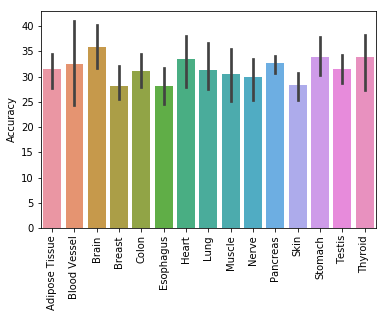

In [347]:
import seaborn as sns
ax = sns.barplot(x=ts,y=accuracies)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(ylabel='Accuracy')